In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pylab import rcParams

import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/home/tellocam/CSE/AMP/NebulaData/dataContention/utils.py'>

In [133]:
saveStuff = True
# Set this to true if you want to save the figures again

In [134]:
df_LockOMP = pd.read_csv("benchLockOMP_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_CriticalOMP = pd.read_csv("benchCriticalOMP_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_TAS = pd.read_csv("benchTAS_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_TATAS = pd.read_csv("benchTATAS_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_Ticket = pd.read_csv("benchTicket_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_array = pd.read_csv("benchArray_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_CLH = pd.read_csv("benchCLH_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_MCS = pd.read_csv("benchMCS_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)
df_Hemlock = pd.read_csv("benchHemlock_SC64_ACQ500_ITER100_Nebula.txt", delimiter='\t').fillna(0)

In [135]:
rcParams['figure.figsize'] = 7, 5
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE-2)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 1000


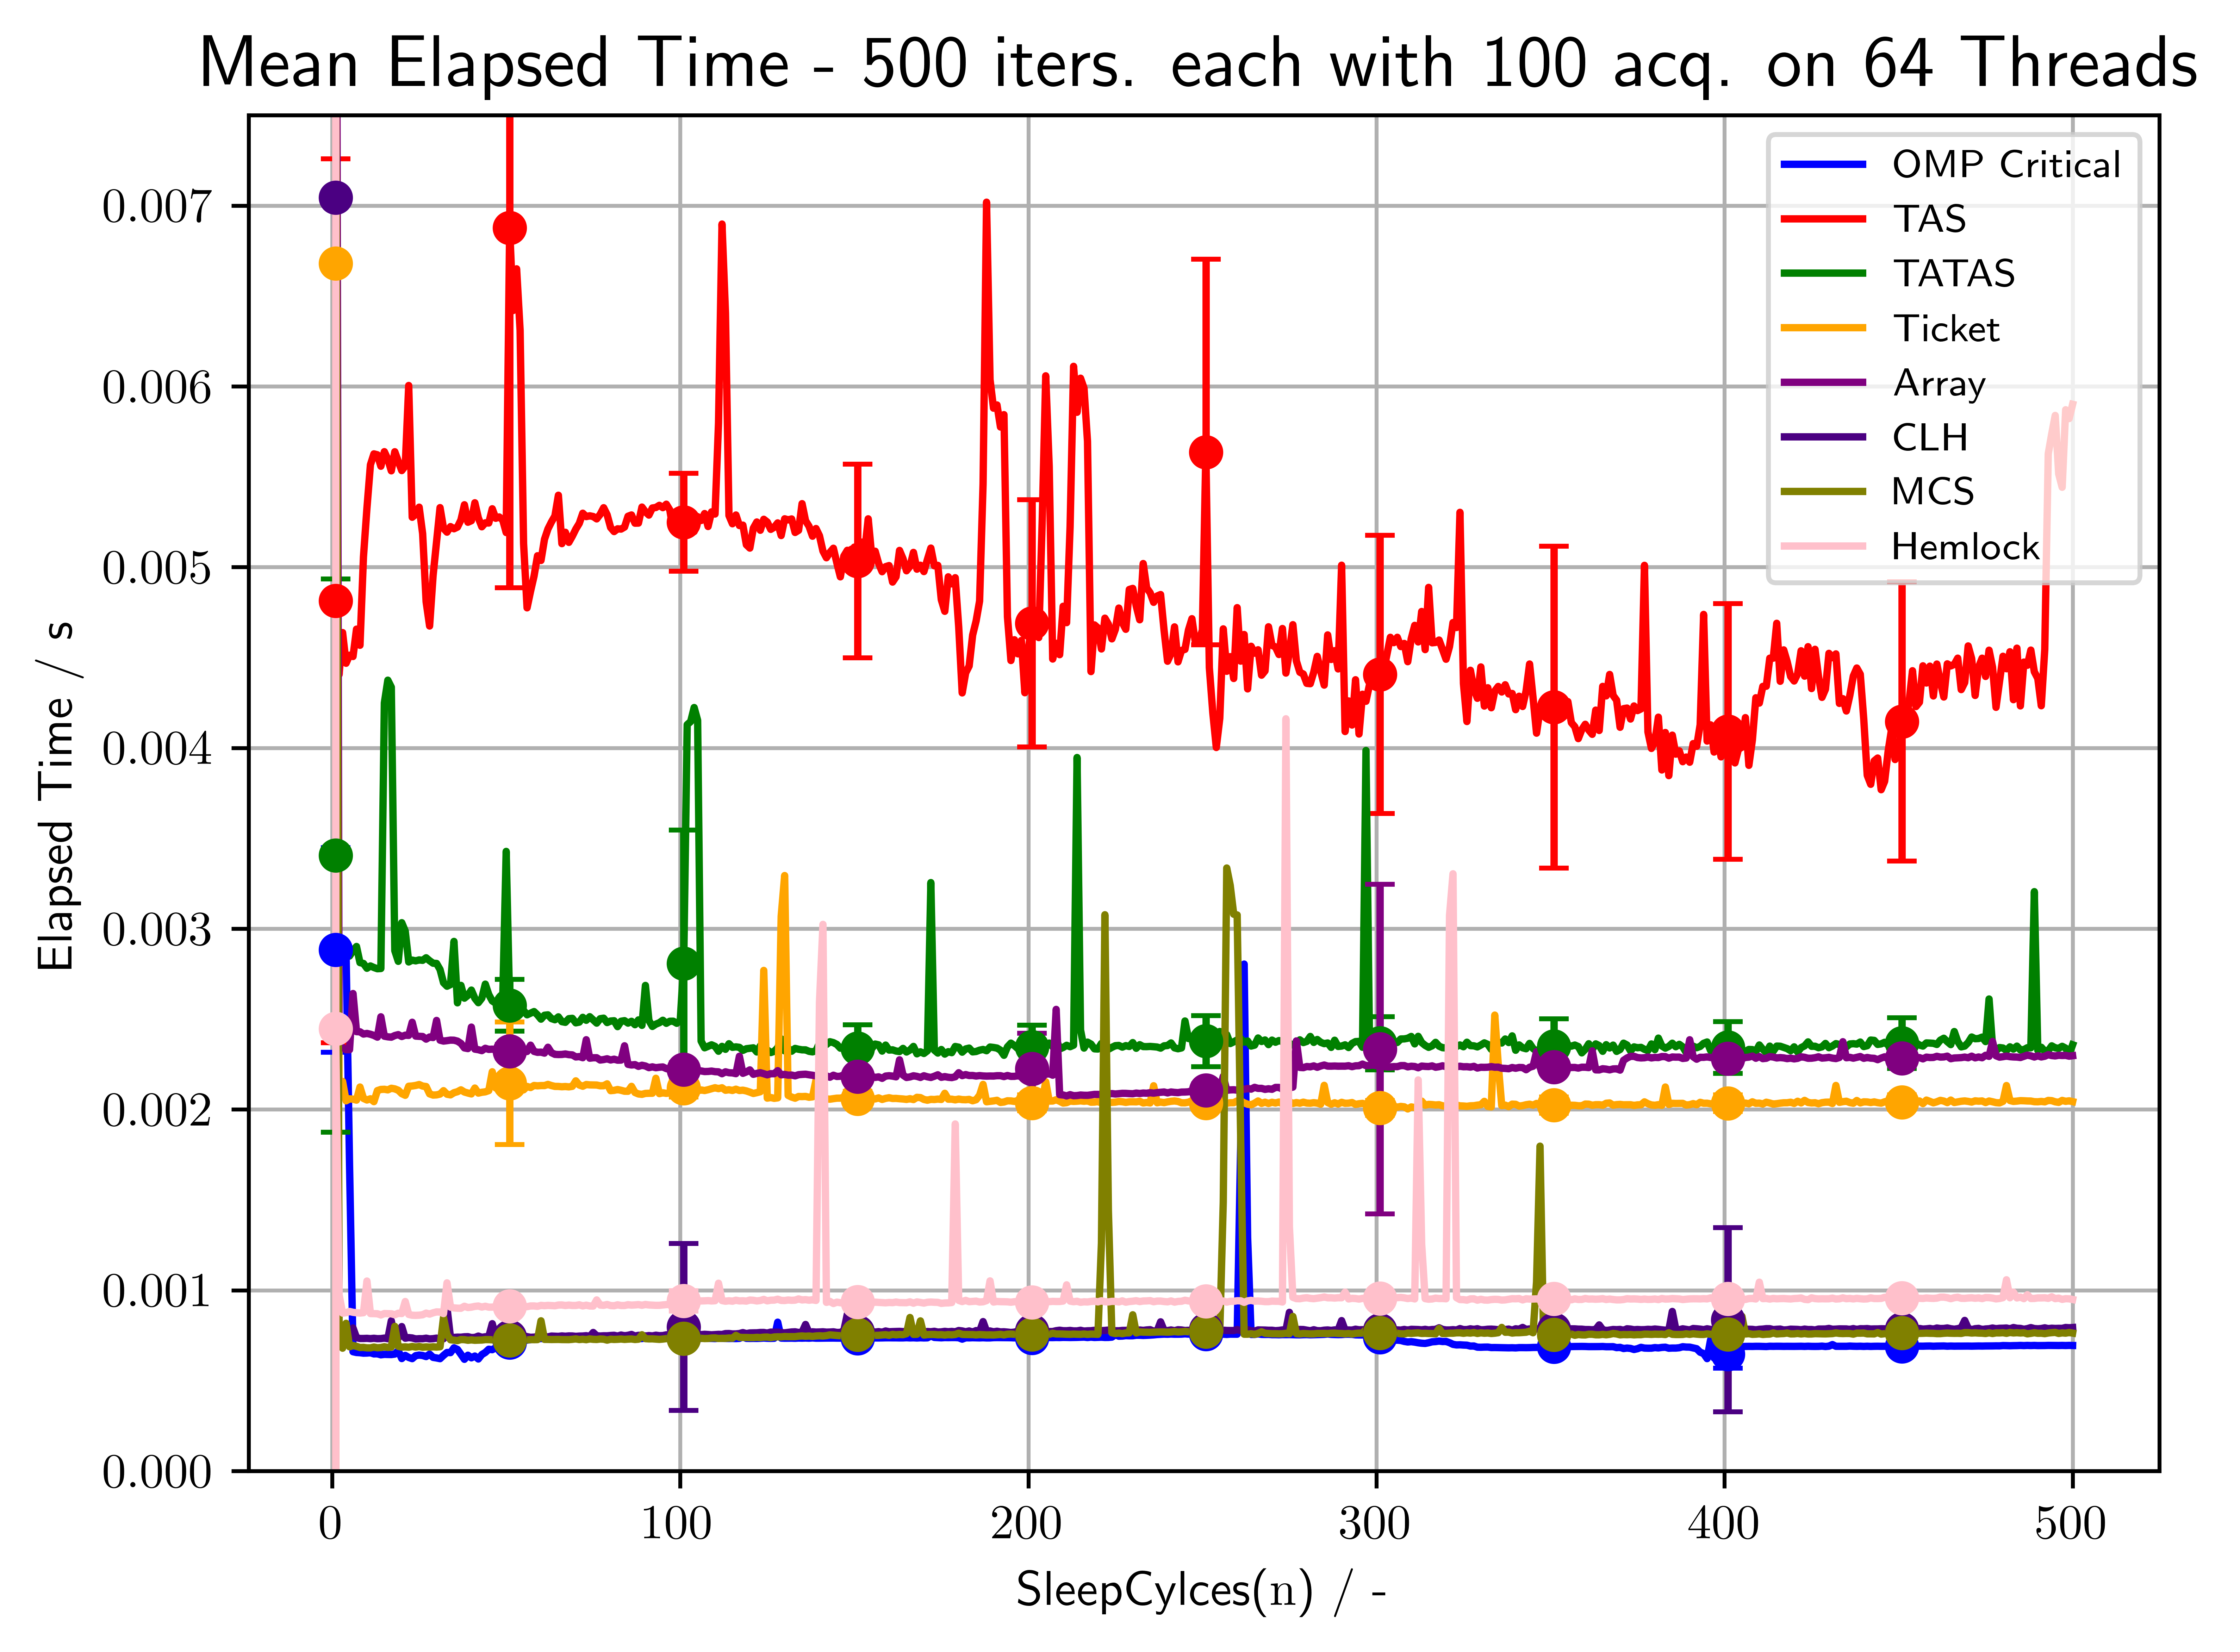

In [136]:
plotWhat = "Time"  # Time, Wait, Fail, Fair, TP - these strings can be used in the plotWhat variable plotWhat
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

# utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
utils.plotStuff("cycles", plotWhat, "OMP Critical", df_CriticalOMP, color = "blue")
utils.plotStuff("cycles", plotWhat, "TAS", df_TAS, "red")
utils.plotStuff("cycles", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("cycles", plotWhat, "Ticket", df_Ticket, "orange")
utils.plotStuff("cycles", plotWhat, "Array", df_array, "purple")
utils.plotStuff("cycles", plotWhat, "CLH", df_CLH, "#4B0082")
utils.plotStuff("cycles", plotWhat, "MCS", df_MCS, "#808000")
utils.plotStuff("cycles", plotWhat, "Hemlock", df_Hemlock, "pink")

plt.title("Mean Elapsed Time - 500 iters. each with 100 acq. on 64 Threads")
# plt.xlabel("Threads / $\mathrm{s}$")
plt.xlabel("SleepCylces($\mathrm{n}$) / - ")
plt.ylabel("Elapsed Time / s")
# plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left')
plt.legend()
plt.grid()
plt.ylim([0, 0.0075])

if (saveStuff == True):
    plt.savefig("../plots/VariableContention/Time_Contention.pdf")

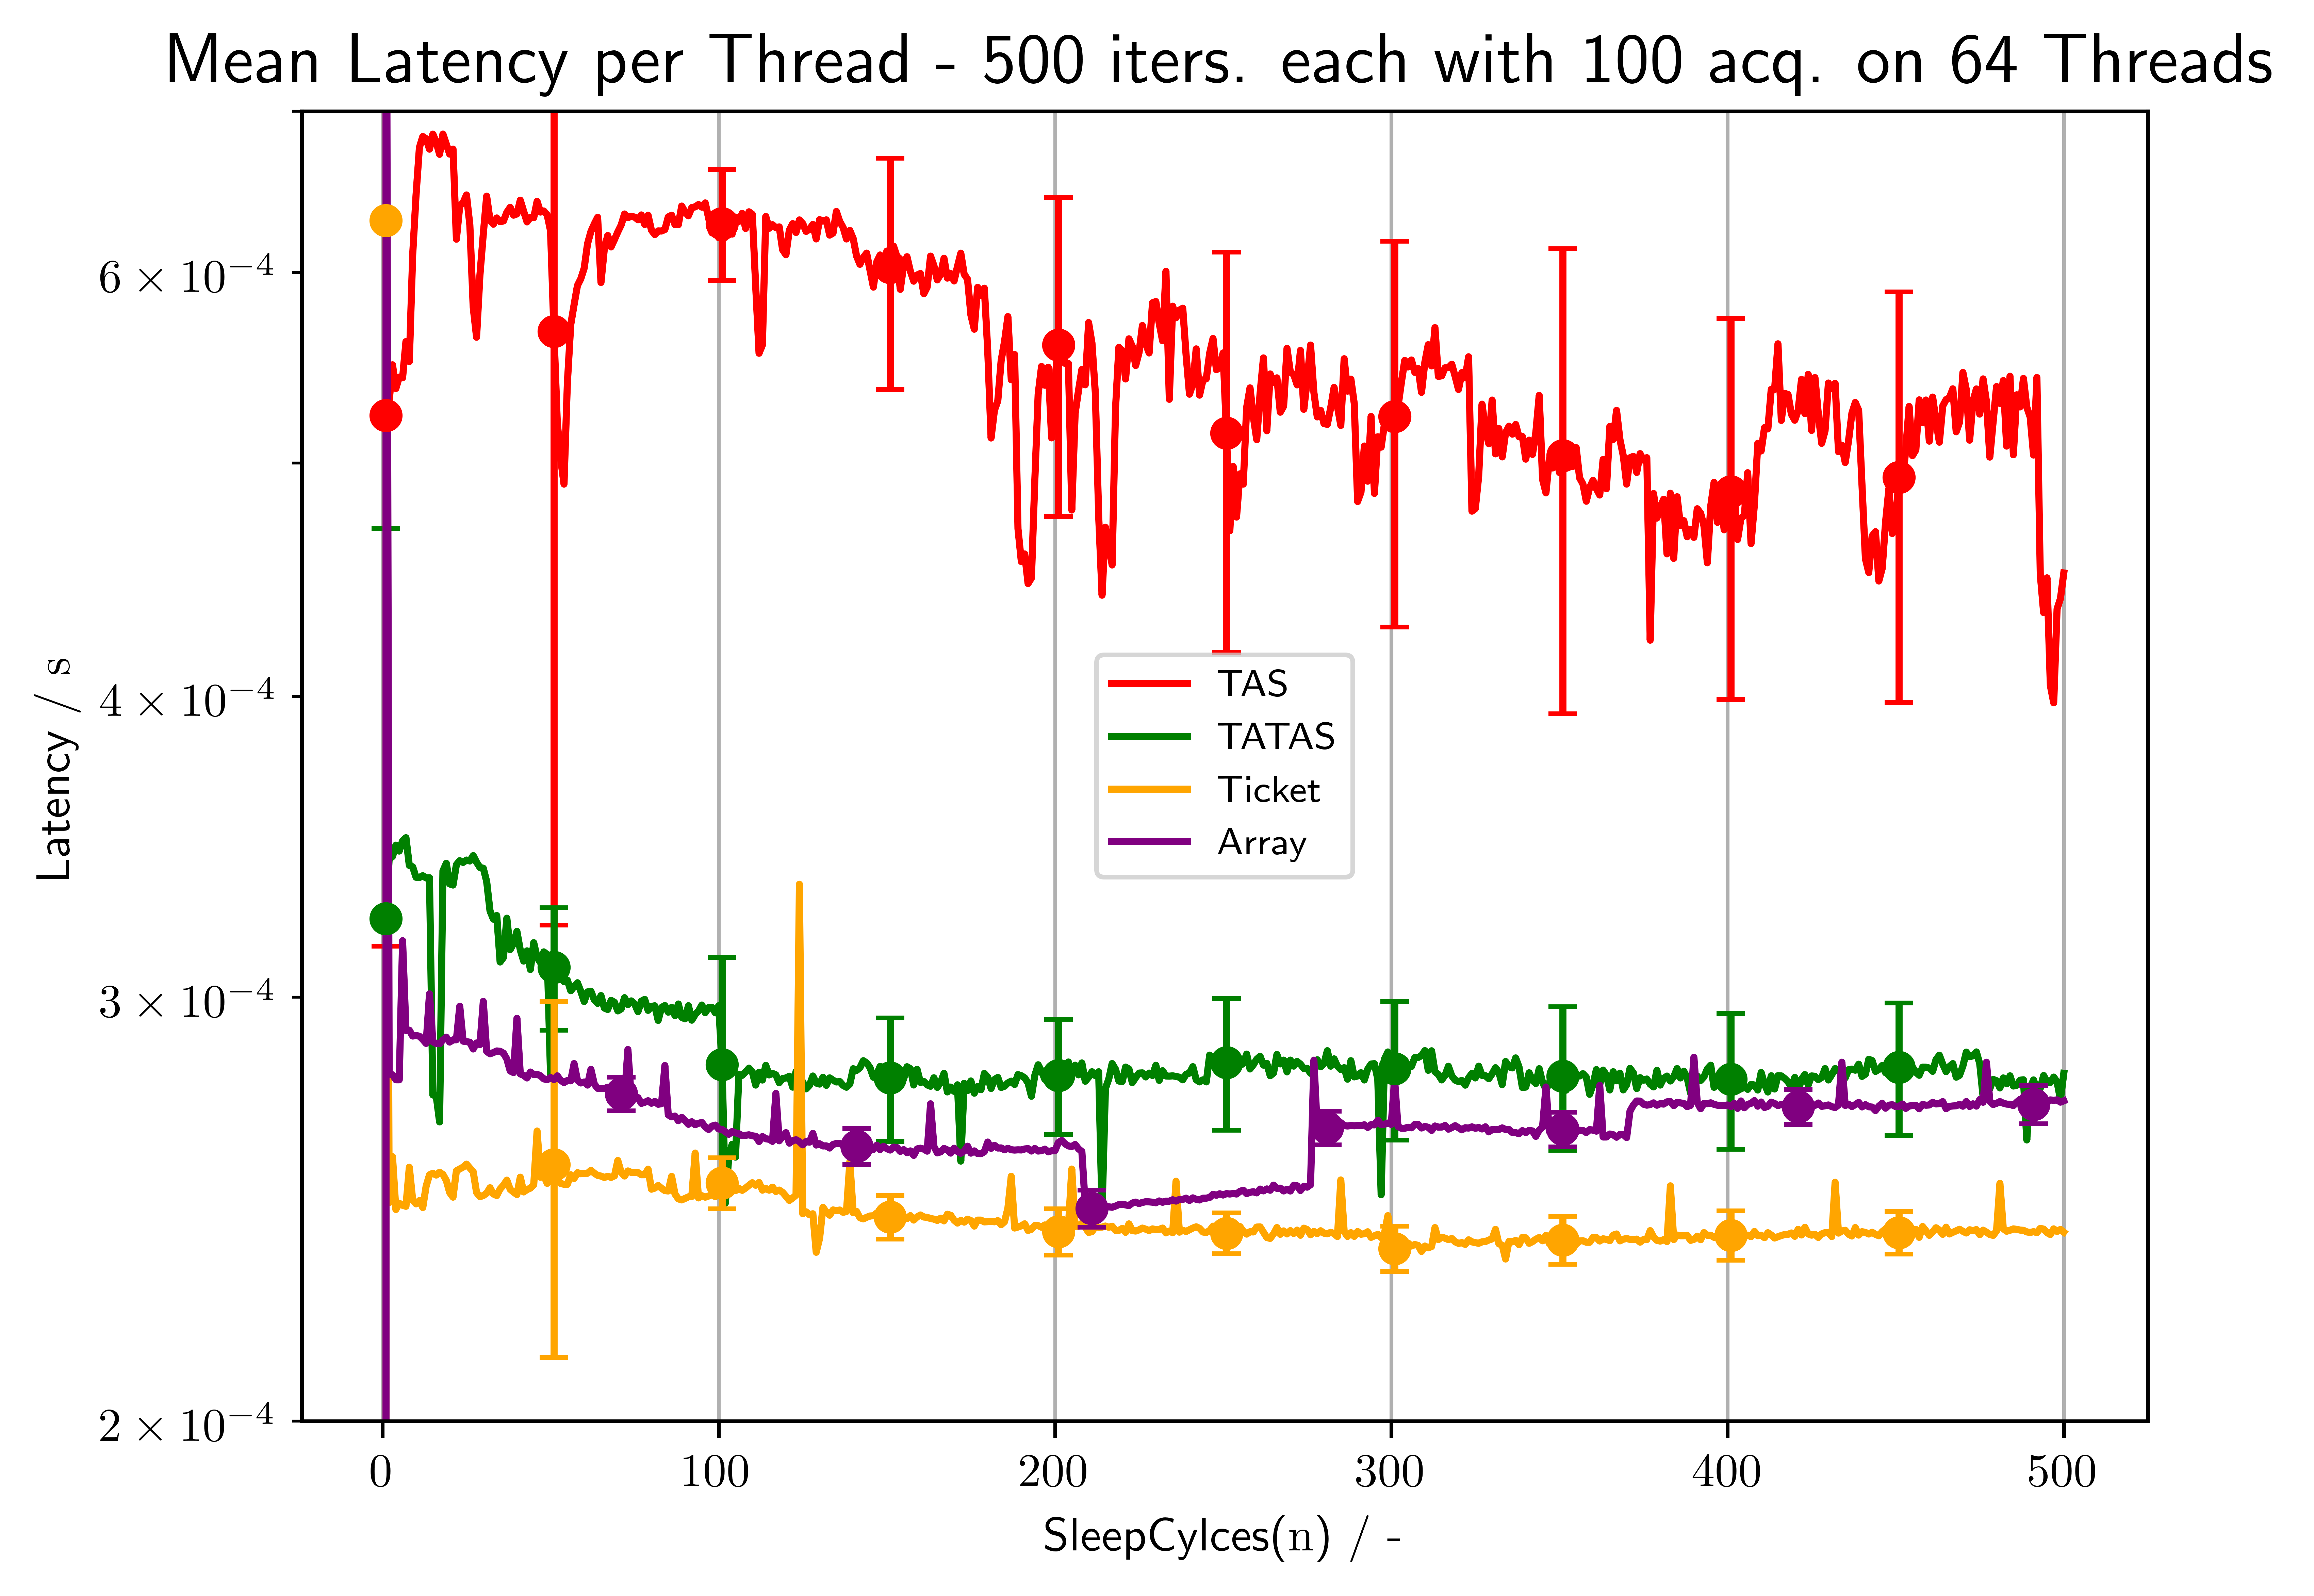

In [137]:
plotWhat = "Wait"  # Time, Wait, Fail, Fair, TP - these strings can be used in the plotWhat variable plotWhat
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

# utils.plotStuff("cycles", plotWhat, "OMP Lock", df_LockOMP, "black")
# utils.plotStuff("cycles", plotWhat, "OMP Critical", df_CriticalOMP, color = "blue")
utils.plotStuff("cycles", plotWhat, "TAS", df_TAS, "red")
utils.plotStuff("cycles", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("cycles", plotWhat, "Ticket", df_Ticket, "orange")
utils.plotStuffSemilogy("cycles", plotWhat, "Array", df_array, "purple")
# utils.plotStuff("cycles", plotWhat, "CLH", df_CLH, "#4B0082")
# utils.plotStuff("cycles", plotWhat, "MCS", df_MCS, "#808000")
# utils.plotStuffSemilogy("cycles", plotWhat, "Hemlock", df_Hemlock, "pink")

plt.title("Mean Latency per Thread - 500 iters. each with 100 acq. on 64 Threads")
plt.xlabel("SleepCylces($\mathrm{n}$) / - ")
plt.ylabel("Latency / $\mathrm{s}$")
# plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left')
plt.legend()
plt.grid()
plt.ylim([0.0002,0.0007])

if (saveStuff == True):
    plt.savefig("../plots/VariableContention/Latency_Contention.pdf")

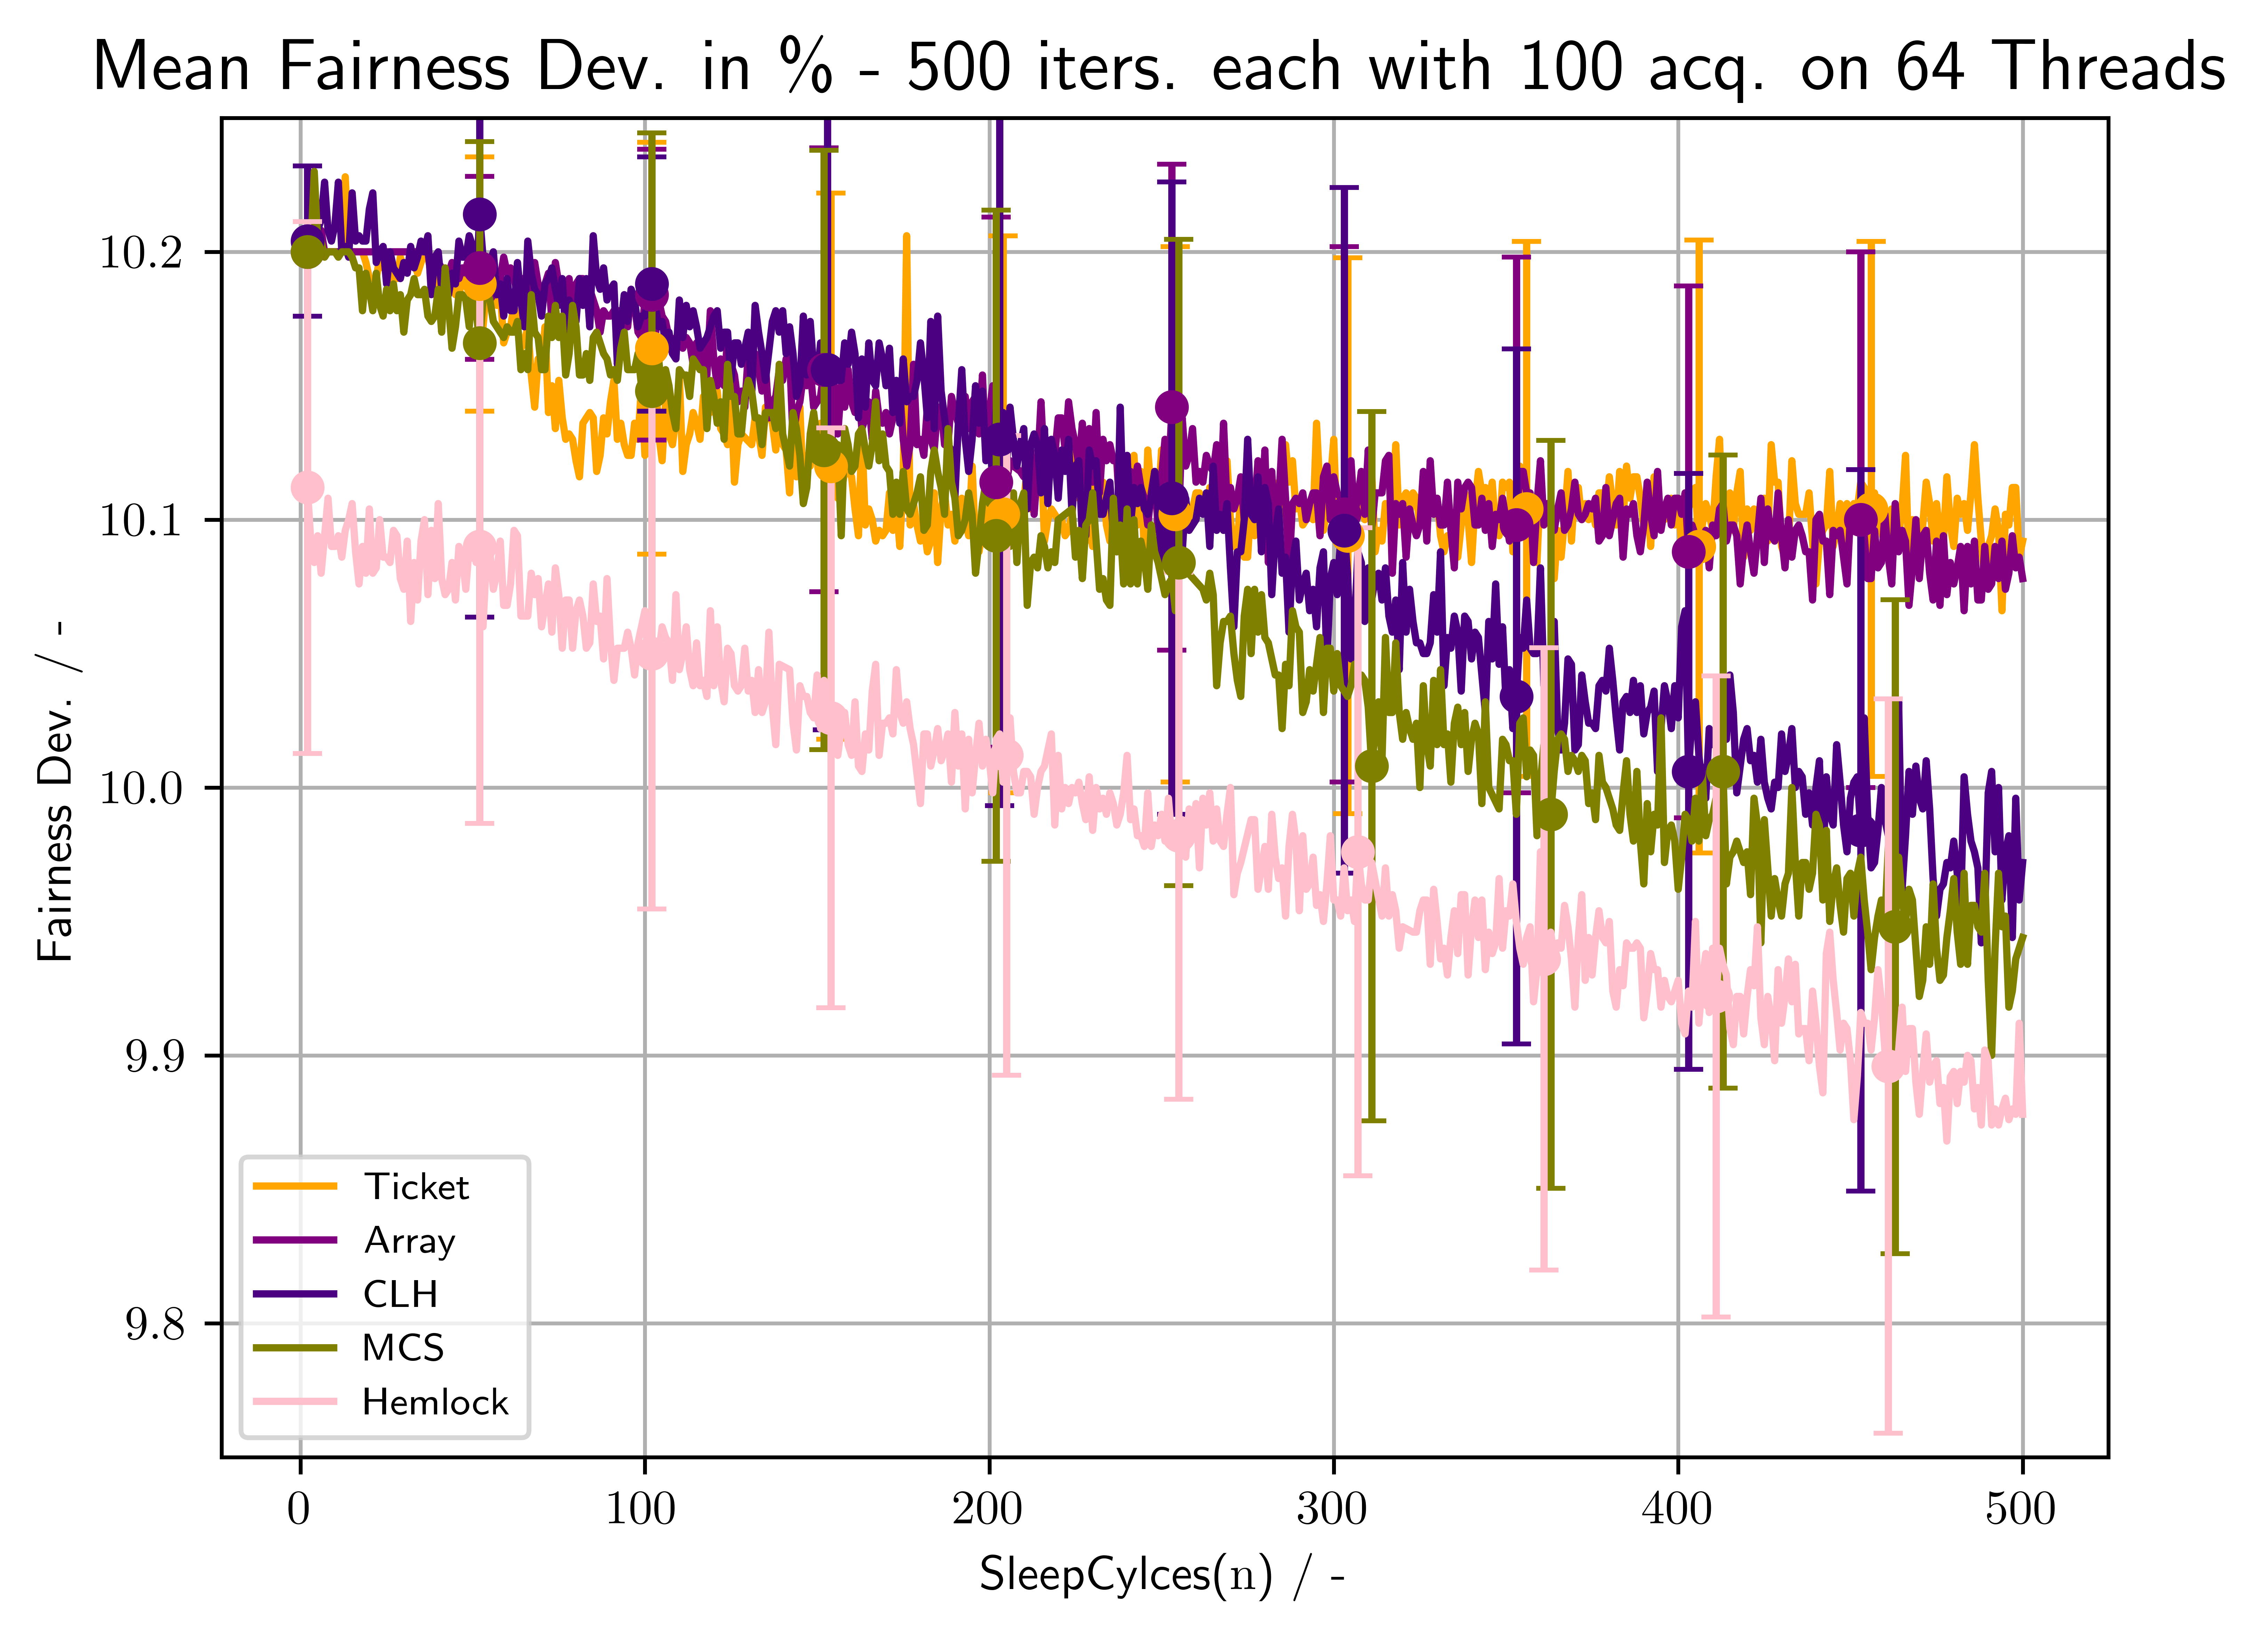

In [138]:
plotWhat = "Fair"  # Time, Wait, Fail, Fair, TP - these strings can be used in the plotWhat variable plotWhat
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

df = df_Ticket.drop(df_Ticket[df_Ticket["meanFair"] > 10.3].index)
dfArray = df_array.drop(df_array[df_array["meanFair"] > 10.3].index)
dfCLH = df_CLH.drop(df_CLH[df_CLH["meanFair"] > 10.3].index)
dfMCS = df_MCS.drop(df_MCS[df_MCS["meanFair"] > 10.3].index)
dfHemlock = df_Hemlock.drop(df_Hemlock[df_Hemlock["meanFair"] > 10.3].index)

# utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
# utils.plotStuff("cycles", plotWhat, "OMP Critical", df_CriticalOMP, color = "blue")
# utils.plotStuff("cycles", plotWhat, "TAS", df_TAS, "red")
# utils.plotStuff("cycles", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("cycles", plotWhat, "Ticket", df, "orange")
utils.plotStuff("cycles", plotWhat, "Array", dfArray, "purple")
utils.plotStuff("cycles", plotWhat, "CLH", dfCLH, "#4B0082")
utils.plotStuff("cycles", plotWhat, "MCS", dfMCS, "#808000")
utils.plotStuff("cycles", plotWhat, "Hemlock", dfHemlock, "pink")

plt.title("Mean Fairness Dev. in \% - 500 iters. each with 100 acq. on 64 Threads")
plt.xlabel("SleepCylces($\mathrm{n}$) / - ")
plt.ylabel("Fairness Dev. / -")
plt.legend()
plt.grid()
plt.ylim([9.75,10.25])

if (saveStuff == True):
    plt.savefig("../plots/VariableContention/Fairness_Contention.pdf")

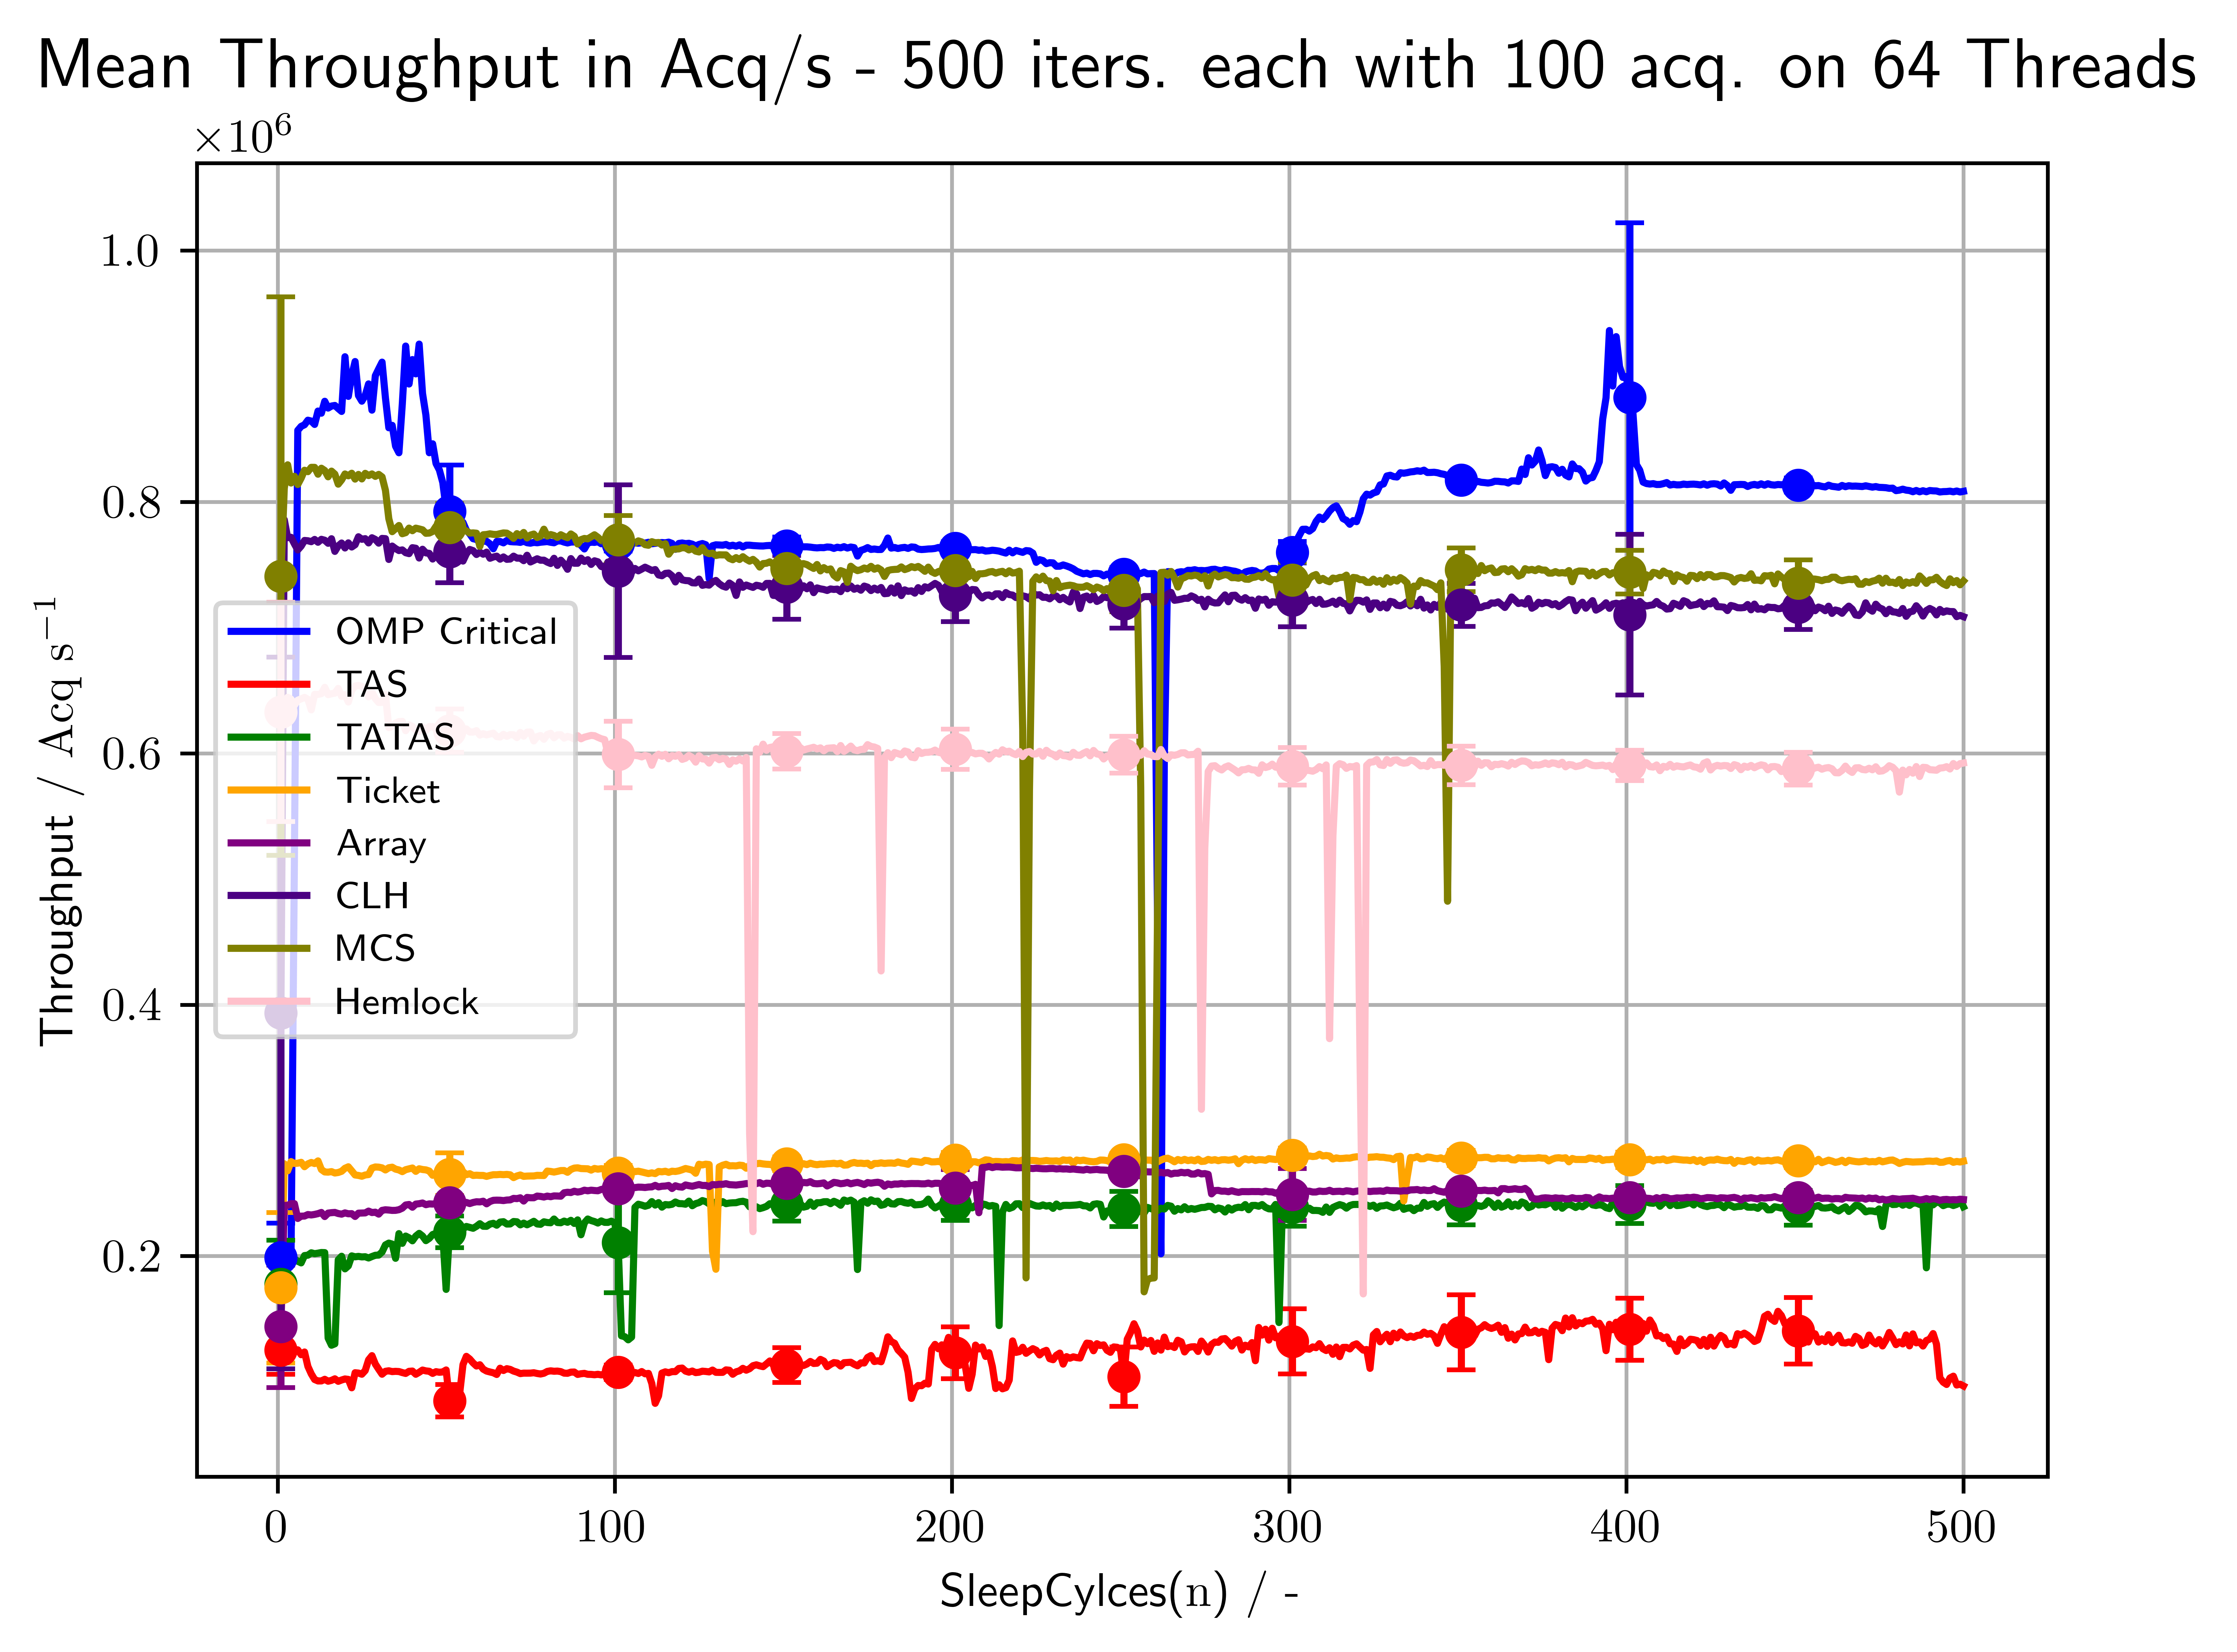

In [139]:
plotWhat = "TP"  # Time, Wait, Fail, Fair, TP - these strings can be used in the plotWhat variable plotWhat
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

# utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
utils.plotStuff("cycles", plotWhat, "OMP Critical", df_CriticalOMP, color = "blue")
utils.plotStuff("cycles", plotWhat, "TAS", df_TAS, "red")
utils.plotStuff("cycles", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("cycles", plotWhat, "Ticket", df_Ticket, "orange")
utils.plotStuff("cycles", plotWhat, "Array", df_array, "purple")
utils.plotStuff("cycles", plotWhat, "CLH", df_CLH, "#4B0082")
utils.plotStuff("cycles", plotWhat, "MCS", df_MCS, "#808000")
utils.plotStuff("cycles", plotWhat, "Hemlock", df_Hemlock, "pink")

plt.title("Mean Throughput in Acq/s - 500 iters. each with 100 acq. on 64 Threads")
plt.xlabel("SleepCylces($\mathrm{n}$) / - ")
plt.ylabel("Throughput / $\mathrm{Acq}$  $\mathrm{s}^{-1}$")
plt.legend()
plt.grid()

if (saveStuff == True):
    plt.savefig("../plots/VariableContention/Throughput_Contention.pdf")